## AdaBoost Regression: Predicting the Occurrences of Heart Disease in Patients

## What is AdaBoost Regression?

**AdaBoost Regression** is a version of AdaBoost used to predict numbers instead of categories. It combines several weak models (usually small decision trees) to make better predictions. Each new model focuses more on the predictions that were far off, trying to fix the big mistakes made by earlier models. In the end, all the models work together to give a final, more accurate result—like a group of guessers learning from each other’s errors to make a smarter guess.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

# Set the Seaborn theme
sns.set_theme()

## Our Task
We will be predicting the occurrence of heart disease in patients using **AdaBoost Regression** technique.


##  Load and Preprocess the Hearts Dataset
We will use the `hearts` dataset and classify a patient as either **Has Heart Disease**(label=1) or **Does not have Heart Disease**(label=0)

We'll also drop any rows with missing values.

## Normalize and Prepare Features
Logistic regression works best when the input features are on a similar scale. We'll normalize the features to have mean 0 and standard deviation 1.

In [7]:
# Load and process the heart dataset 
data = pd.read_csv("heart.csv")
hearts = data.copy(deep = True)

le = LabelEncoder()#Label Encoding

#Label Encode all Categorical data
hearts['Sex'] = le.fit_transform(hearts['Sex'])
hearts['ChestPainType'] = le.fit_transform(hearts['ChestPainType'])
hearts['RestingECG'] = le.fit_transform(hearts['RestingECG'])
hearts['ExerciseAngina'] = le.fit_transform(hearts['ExerciseAngina'])
hearts['ST_Slope'] = le.fit_transform(hearts['ST_Slope'])

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Normalize Oldpeak and Standardize the rest of the numerical data
hearts['Oldpeak'] = mms.fit_transform(hearts[['Oldpeak']])
hearts['Age'] = ss.fit_transform(hearts[['Age']])
hearts['RestingBP'] = ss.fit_transform(hearts[['RestingBP']])
hearts['Cholesterol'] = ss.fit_transform(hearts[['Cholesterol']])
hearts['MaxHR'] = ss.fit_transform(hearts[['MaxHR']])
hearts.head

<bound method NDFrame.head of           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140    1              1   0.410909     0.825070          0   
1   -0.478484    0              2   1.491752    -0.171961          0   
2   -1.751359    1              1  -0.129513     0.770188          0   
3   -0.584556    0              0   0.302825     0.139040          0   
4    0.051881    1              2   0.951331    -0.034755          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.902775    1              3  -1.210356     0.596393          0   
914  1.536902    1              0   0.627078    -0.053049          1   
915  0.370100    1              0  -0.129513    -0.620168          0   
916  0.370100    0              1  -0.129513     0.340275          0   
917 -1.645286    1              2   0.302825    -0.217696          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  1.382928  

# Features Selection
To better understand why we selected these specific features for classification, read the **Perceptron_hearts** file.

We'll select the "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex","ChestPainType","Cholesterol", and "FastingBS" for classification.

In [8]:
features = [
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex", "HeartDisease","ChestPainType","Cholesterol","FastingBS"
]
filtered_df= hearts[features].reset_index(drop=True)
X = filtered_df[filtered_df.columns.drop(['HeartDisease'])].values
y = filtered_df['HeartDisease'].values

## Splitting Data into Training and Test Sets

We split our dataset into training and testing sets to evaluate model performance later.

In [9]:
#Split data into test and trainung data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## AdaBoost Regression Implementation
We will implement the **AdaBoost Regression** technique using the **AdaBoostRegressor** from the **sklearn.ensemble** module and the **LinearRegression** from **sklearn.linear_model** 

Here we train our model and predict using the test values

In [10]:
# Create and train AdaBoost regressor
ada_reg = AdaBoostRegressor(
    LinearRegression(),
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)
ada_reg.fit(X_train, y_train)

# Make predictions
ada_y_pred = ada_reg.predict(X_test)

## Evaluate the Model Accuracy

Here we plot a confusion matrix and give a classification report on the model.

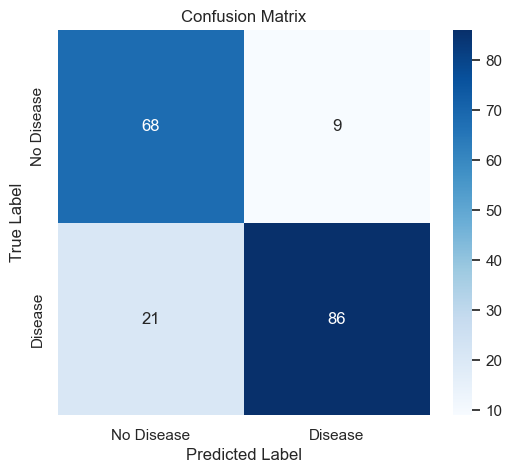

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.76      0.88      0.82        77
     Disease       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [15]:
y_pred=ada_y_pred
y_pred = (y_pred >= 0.5).astype(int)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

## Evaluate MSE

In [16]:
# Calculate metrics
mse = mean_squared_error(y_test, ada_y_pred)
r2 = r2_score(y_test, ada_y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.1360
R² Score: 0.4410
